<a href="https://colab.research.google.com/github/Argendion/Project2_IA80h/blob/main/Proyecto2__IA_80h.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediccion de Costos Médicos para una aseguradora
####Kasthlen, Beatriz, Angelica y Teo

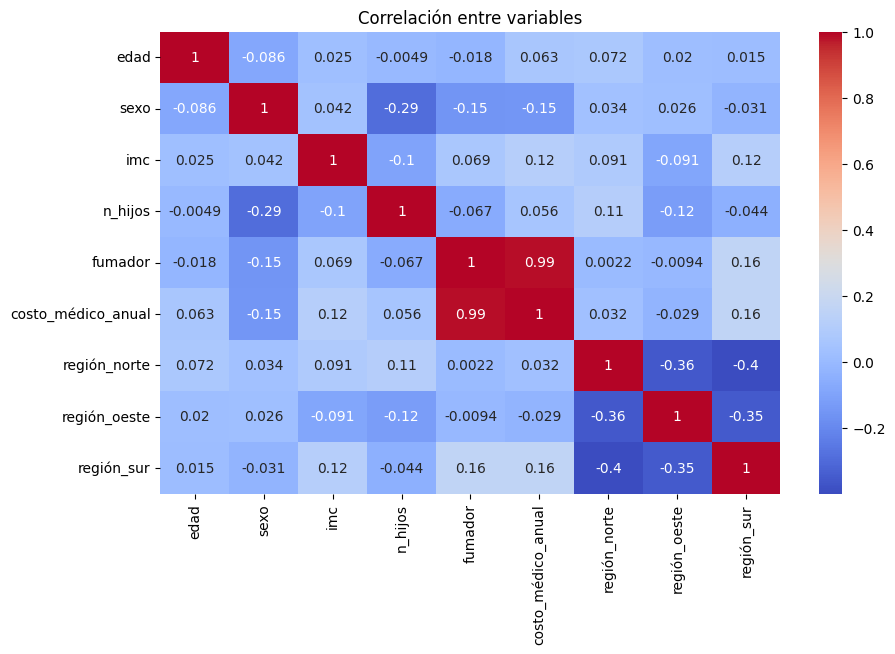

Modelo: Regresión Lineal
MSE: 3.611884144712795e-22
RMSE 1.900495762876833e-11
R2: 1.0


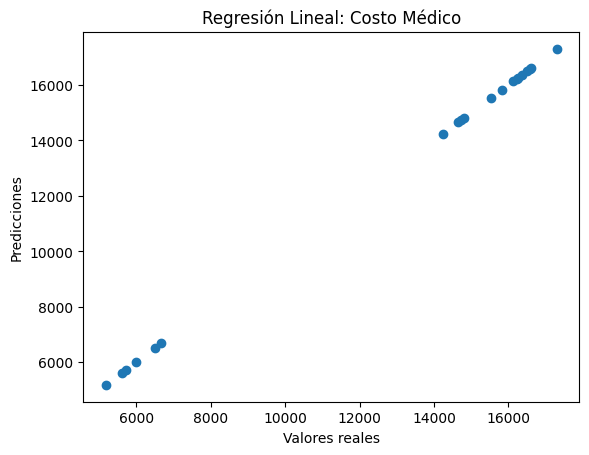

Modelo: Random Forest
MSE: 173659.94362500004
RMSE 416.7252615632991
R2: 0.9917887479722023


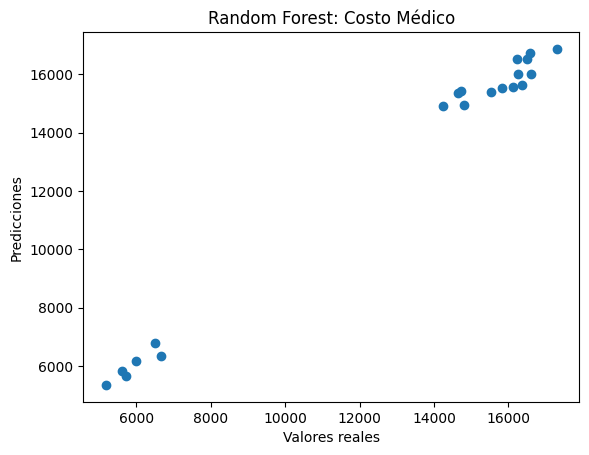

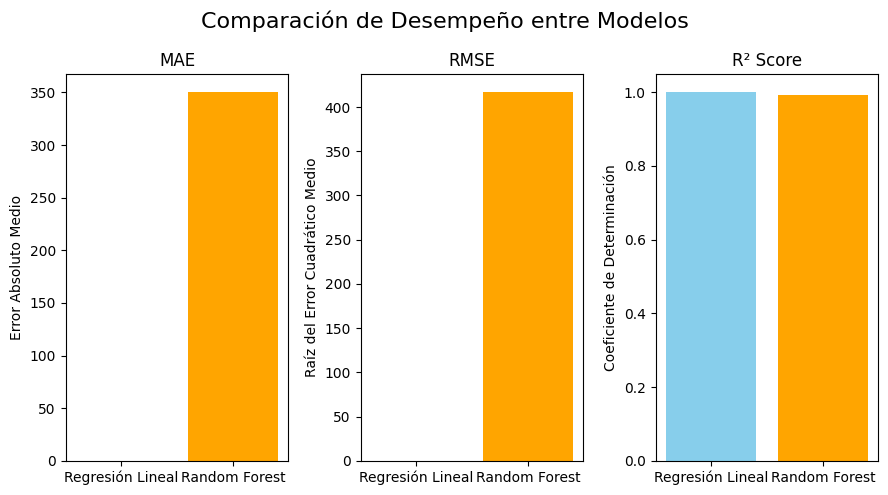

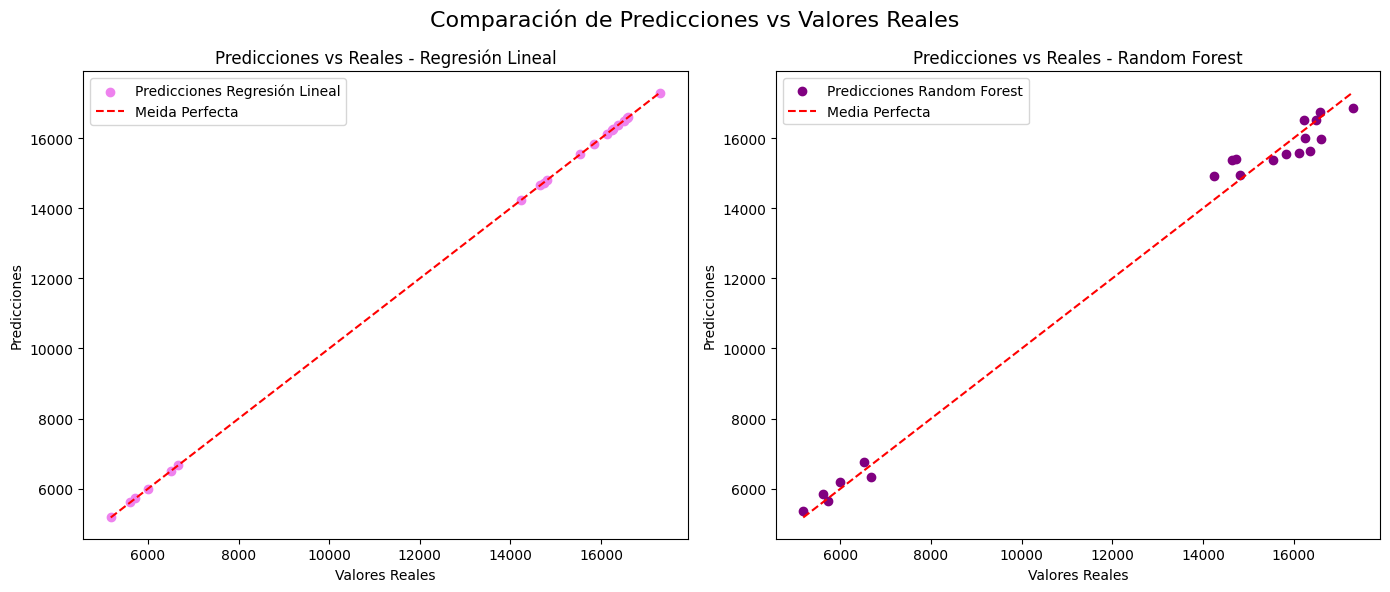

In [3]:
'''

Edad
Sexo
IMC
Número de hijos
Fumador

Objetivo: Costo medico anual
'''
# Manejar tablas
import pandas as pd
# Operaciones matematicas coplejas
import numpy as np

# Modelo de regresion lineal
from sklearn.linear_model import LinearRegression
# Dividir entre entrenamiento y prueba
from sklearn.model_selection import train_test_split
# Para evaluar el rendiminto del modelo
from sklearn.metrics import mean_squared_error, r2_score
# Para convertir variables categoricas en numeros
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor


# Poner datos en graficos
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular precision con más acierto
from sklearn.metrics import mean_absolute_error
# Insertar advertencias
import warnings
warnings.filterwarnings('ignore')

# Leer archivo (Descomentar despues)
df = pd.read_csv('datos_medicos_simulados.csv')

'''
Edad
Sexo
IMC
Número de hijos
Fumador
'''
# Limpieza de datos
print(df.head())        # Muestra las primeras filas
print(df.info())        # Tipos de datos y nulos
print(df.describe())    # Estadísticas generales (solo numéricas)
print(df.isnull().sum())  # Suma cuántos valores nulos hay por columna
# Eliminar datos nulos
df = df.dropna()
# Rellenar datos nulos numericos
df['imc'] = df['imc'].fillna(df['imc'].mean())
df['edad'] = df['edad'].fillna(df['edad'].mean())
df['n_hijos'] = df['n_hijos'].fillna(df['n_hijos'].mean())
df['costo_medico_anual'] = df['costo_medico_anual'].fillna(df['costo_medico_anual'].mean())
# Rellenar datos nulos categoricos
df['sexo'] = df['sexo'].fillna(df['sexo'].mode()[0])
df['fumador'] = df['fumador'].fillna(df['fumador'].mode()[0])
df['región'] = df['región'].fillna(df['región'].mode()[0])


# Pre procecasr datos (Convertir en valores numericos)
le_sexo = LabelEncoder()
le_fumador = LabelEncoder()
df['sexo'] = le_sexo.fit_transform(df['sexo'])
df['fumador'] = le_fumador.fit_transform(df['fumador'])
# Combierte en valores binarios (Recomendado cuando hay más de 2 [???] )
# ['region'], drop_first=True ---> hace que las variables independientes no se junten.
df = pd.get_dummies(df, columns=['región'], drop_first=True)

#Mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlación entre variables")
plt.show()

# definir los ejes
x = df.drop('costo_médico_anual', axis=1)
y = df['costo_médico_anual']

# Para entrenar y testear (random_state=42 ---> la division es siempre la misma porque numeros)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Crear modelo vacio regresion LINEAL
model_ln = LinearRegression()
# Entrena el modelo
model_ln.fit(x_train, y_train)
# Prediccion del modelo
y_pred_ln = model_ln.predict(x_test)


# Crear modelo vacio RD FOREST
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
# Entrena el modelo
modelo_rf.fit(x_train, y_train)
# Prediccion del modelo
y_pred_rf = modelo_rf.predict(x_test)


def evaluar_modelo(y_test, y_pred,name):
  print("Modelo:", name)
  # Error promedio al cuadrado
  print("MSE:", mean_squared_error(y_test, y_pred))
  # raiz cuadrada de MSE
  print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))
  # Variacion de datos
  print("R2:", r2_score(y_test, y_pred))
  plt.scatter(y_test, y_pred)
  plt.xlabel("Valores reales")
  plt.ylabel("Predicciones")
  plt.title(f"{name}: Costo Médico")
  plt.show()

evaluar_modelo(y_test, y_pred_ln, "Regresión Lineal")
evaluar_modelo(y_test, y_pred_rf, "Random Forest")


# Calcular métricas Ora vez (Esto se puede hacer más eficiente)
mae_ln = mean_absolute_error(y_test, y_pred_ln)
rmse_ln = np.sqrt(mean_squared_error(y_test, y_pred_ln))
r2_ln = r2_score(y_test, y_pred_ln)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Organizar datos Para crear graficas para cada uno
modelos = ['Regresión Lineal', 'Random Forest']
mae = [mae_ln, mae_rf]
rmse = [rmse_ln, rmse_rf]
r2 = [r2_ln, r2_rf]

# Crear gráfico plt.subplots(filas , columnas, figsize=([???],[???]))
fig, ax = plt.subplots(1, 3, figsize=(9, 5))

# Tabla MAE
ax[0].bar(modelos, mae, color=['skyblue', 'orange'])
ax[0].set_title('MAE')
ax[0].set_ylabel('Error Absoluto Medio')

# Tabla RMSE
ax[1].bar(modelos, rmse, color=['skyblue', 'orange'])
ax[1].set_title('RMSE')
ax[1].set_ylabel('Raíz del Error Cuadrático Medio')

# Tabla R^2
ax[2].bar(modelos, r2, color=['skyblue', 'orange'])
ax[2].set_title('R² Score')
ax[2].set_ylabel('Coeficiente de Determinación')

plt.suptitle('Comparación de Desempeño entre Modelos', fontsize=16)
plt.tight_layout()
plt.show()

# Crear gráficos de dispersión para comparar las predicciones
plt.figure(figsize=(14, 6))

# Gráfico de predicciones de Regresión Lineal vs valores reales
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ln, color='violet', label='Predicciones Regresión Lineal')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Meida Perfecta')
plt.title('Predicciones vs Reales - Regresión Lineal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()

# Gráfico de predicciones de Random Forest vs valores reales
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='purple', label='Predicciones Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Media Perfecta')
plt.title('Predicciones vs Reales - Random Forest')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()

plt.suptitle('Comparación de Predicciones vs Valores Reales', fontsize=16)
plt.tight_layout()
plt.show()